In [57]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import os

In [58]:
today = date.today()


In [59]:
password = pd.read_csv("passwords.csv")
password_nps = password["password"][0]


In [60]:
path = "./Reference data/Park Unit Scraping Information.csv"
parks = pd.read_csv(path, encoding='latin-1')
parks.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [61]:
#pull API using API key
road_events_url = "https://developer.nps.gov/api/v1/roadevents?api_key=" + password_nps

response_API = requests.get(road_events_url)
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [62]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [63]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [64]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(19, 168, 60)

In [65]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
id_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Alert ID: ", x['properties']['core_details']['data_source_id'])
  #  print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    id_list.append(x['properties']['core_details']['data_source_id'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  All Park Roads CLOSED
Description:  All park roads are temporarily CLOSED due to the latest winter storm and equipment issues.  
Event type:  incident
Road name:  ['ALL PARK ROADS']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  All Park Roads CLOSED
Description:  All park roads are temporarily CLOSED due to the latest winter storm and equipment issues.  
Event type:  incident
Road name:  ['ALL PARK ROADS']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  All Park Roads CLOSED
Description:  All park roads are temporarily CLOSED due to the latest winter storm and equipment issues.  
Event type:  incident
Road name:  ['ALL PARK ROADS']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  All Park Roads CLOSED
Des

In [66]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "alert_id": id_list
#    "event end date": end_date_list
})
df_update.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id
0,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
1,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
2,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
3,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
4,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2


In [67]:
parks.rename(columns={'Park Full Name':"park", "Reg":"region","Alpha":"alpha"}, inplace = True)
parks = parks[['park', 'region', 'alpha', "State"]]
parks.head()

,park,region,alpha,State
0,Alagnak Wild River,AKR,ALAG,AK
1,Aniakchak National Monument and Preserve,AKR,ANIA,AK
2,Bering Land Bridge National Preserve,AKR,BELA,AK
3,Cape Krusenstern National Monument,AKR,CAKR,AK
4,Denali National Park and Preserve,AKR,DENA,AK


In [68]:
merged_df = pd.merge(df_update, parks, on="park", how="inner")
merged_df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
1,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
2,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
3,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
4,2024-11-13,Crater Lake National Park,All Park Roads CLOSED,All park roads are temporarily CLOSED due to t...,incident,[ALL PARK ROADS],all-lanes-closed,2024-11-13T17:47:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR


In [69]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [70]:
df_update = pd.concat([merged_df, df_old_update])


In [71]:
null_region_count = merged_df['region'].isnull().sum()
null_region_count

0

In [16]:
if null_region_count == 0:
    df_update.to_csv("./TDx_tracker.csv", index=False)
else:
    null_region_rows = joined[joined['region'].isnull()]
    print("Rows with a null Region column:")
    print(null_region_rows)

In [72]:
len(df_update.park.unique())

34

In [73]:
df_update.shape

(3119, 12)

In [74]:
import datetime as dt

In [75]:
df_update['date'] = pd.to_datetime(df_update['date'], format = 'mixed')

In [76]:
df_update['date'].value_counts()

date
2024-07-03    366
2024-04-19    364
2024-11-13    204
2024-08-28    180
2024-04-29    172
2024-06-28    138
2024-04-26    120
2024-05-22     91
2024-03-04     83
2024-10-09     78
2024-07-16     71
2024-07-10     71
2024-06-17     71
2024-10-31     70
2024-07-23     65
2024-07-24     63
2024-07-02     63
2024-04-02     62
2024-02-05     61
2024-07-30     60
2024-07-31     60
2024-06-06     58
2024-08-22     56
2024-08-16     56
2024-05-08     56
2024-09-10     56
2024-08-13     54
2024-09-17     54
2024-08-14     54
2024-08-07     54
2024-05-02     52
2023-10-17     11
2023-10-23     11
2024-02-01      8
2024-01-11      5
2023-11-27      4
2023-12-18      4
2024-01-18      4
2023-12-28      3
2024-01-04      3
2024-01-25      3
Name: count, dtype: int64

In [77]:
running_park_list = []
date_list = []
park_count_list = []

df_update = df_update.sort_values(by=['date'])

for x in df_update.date.unique():
    df_date = df_update.loc[df_update['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

2023-10-17 00:00:00 :  11
Golden Gate National Recreation Area
Natchez Trace Parkway
Mojave National Preserve
Acadia National Park
Olympic National Park
Dinosaur National Monument
Yosemite National Park
2023-10-23 00:00:00 :  11
2023-11-27 00:00:00 :  4
Padre Island National Seashore
2023-12-18 00:00:00 :  4
Fort Point National Historic Site
Muir Woods National Monument
2023-12-28 00:00:00 :  3
2024-01-04 00:00:00 :  3
2024-01-11 00:00:00 :  5
Shenandoah National Park
2024-01-18 00:00:00 :  4
2024-01-25 00:00:00 :  3
2024-02-01 00:00:00 :  8
2024-02-05 00:00:00 :  61
Death Valley National Park
Bryce Canyon National Park
Valley Forge National Historical Park
Redwood National Park
Organ Pipe Cactus National Monument
Crater Lake National Park
Guadalupe Mountains National Park
Point Reyes National Seashore
Zion National Park
2024-03-04 00:00:00 :  83
Piscataway Park
Great Smoky Mountains National Park
Buffalo National River
2024-04-02 00:00:00 :  62
Black Canyon of the Gunnison National Pa

In [78]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])


In [79]:
# Ensure 'date' is in datetime format and reads all the various formats from the combined_status_tracker
df_count['date'] = pd.to_datetime(df_count['date'],format='mixed')

# Filter for the latest date in each month
df_count['year_month'] = df_count['date'].dt.to_period('M')
latest_dates = df_count.groupby('year_month')['date'].max().reset_index()
df_count_latest = pd.merge(df_count, latest_dates[['date']], on='date')
df_count_latest.dropna(subset=['count of parks'], inplace=True)
df_count_latest.drop_duplicates(subset=['date','count of parks'], inplace=True)
df_count_latest = df_count_latest.reset_index()

df_count_latest['months'] = df_count_latest.date.dt.strftime("%b %Y")
df_count_latest

,index,date,count of parks,year_month,months
0,0,2023-10-23,7,2023-10,Oct 2023
1,1,2023-11-27,8,2023-11,Nov 2023
2,2,2023-12-28,10,2023-12,Dec 2023
3,3,2024-01-25,11,2024-01,Jan 2024
4,4,2024-02-05,20,2024-02,Feb 2024
5,5,2024-03-04,23,2024-03,Mar 2024
6,6,2024-04-29,26,2024-04,Apr 2024
7,7,2024-05-22,30,2024-05,May 2024
8,8,2024-06-28,31,2024-06,Jun 2024
9,9,2024-07-31,31,2024-07,Jul 2024


[]

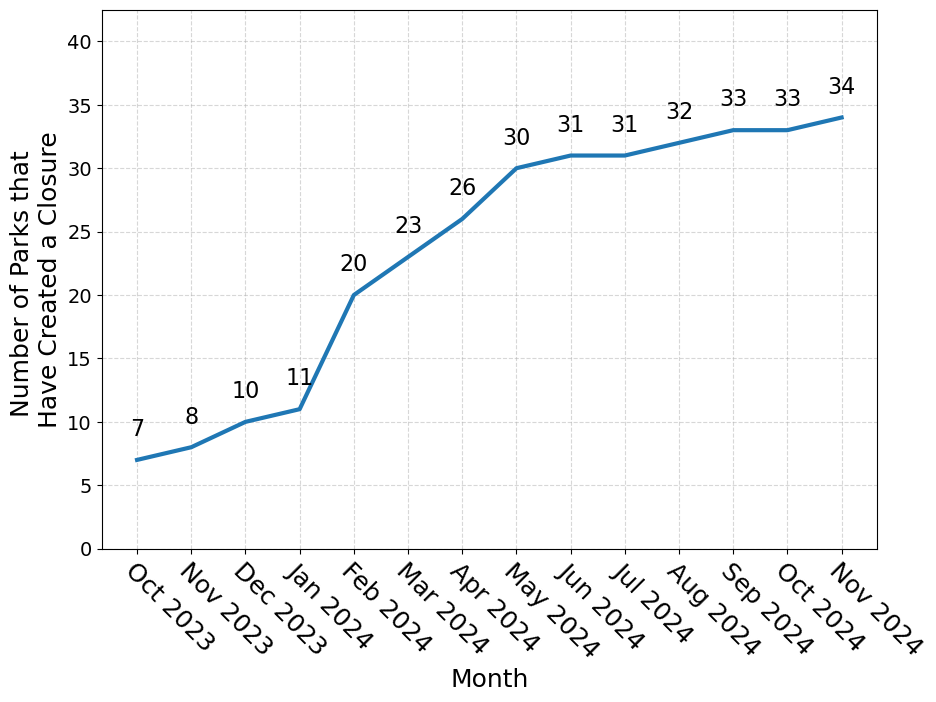

In [80]:
# Adjusting the figure size
fig = plt.subplots(figsize=(10, 7))

# Creating a plot
plt.plot(df_count_latest['months'], df_count_latest['count of parks'], linewidth=3)

for i, j in zip(df_count_latest['months'], df_count_latest['count of parks']):
    plt.text(i, j+1.5, f'{j}', ha='center', va='bottom', fontsize = 16)


# Adding a plot title and customizing its font size
#plt.title('Count of Parks that have use Road Closure & Incident App', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Parks that \nHave Created a Closure', fontsize=18)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=-45, fontsize=18, ha='left', rotation_mode="anchor")
plt.yticks(fontsize=14)
plt.ylim([0,max(df_count_latest['count of parks'])*1.25])
plt.grid(True, linestyle='--', alpha=0.5) 


output_dir = 'Figures/Combined across Regions'
os.makedirs(output_dir, exist_ok=True)

# Save the figure as a PNG file at 150 DPI
filename_string = 'running_alerts_count_' + str(today) + '.png'

output_path = os.path.join(output_dir, filename_string)
plt.savefig(output_path, dpi=150, bbox_inches='tight')

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()


In [81]:
df_count

,date,count of parks,year_month
0,2023-10-17,7,2023-10
1,2023-10-23,7,2023-10
2,2023-11-27,8,2023-11
3,2023-12-18,10,2023-12
4,2023-12-28,10,2023-12
5,2024-01-04,10,2024-01
6,2024-01-11,11,2024-01
7,2024-01-18,11,2024-01
8,2024-01-25,11,2024-01
9,2024-02-01,11,2024-02


## Alerts

In [82]:
#pull API using API key
alerts_url = "https://developer.nps.gov/api/v1/alerts?limit=1000&api_key=" + password_nps

response_API = requests.get(alerts_url)
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [83]:
id_list = []
url_list = []
title_list = []
parkCode_list = []
description_list = []
category_list = []
relatedRoadEvents_list = []
lastIndexedDate_list = []

for x in df['data']:
    #print(x)
    id_list.append(x['id'])
    url_list.append(x['url']) 
    title_list.append(x['title']) 
    parkCode_list.append(x['parkCode'].upper()) 
    description_list.append(x['description'])
    category_list.append(x['category']) 
    relatedRoadEvents_list.append(x['relatedRoadEvents'])
    lastIndexedDate_list.append(x['lastIndexedDate'])


In [84]:
alerts_df = pd.DataFrame({
    'id': id_list, 
    'url': url_list, 
    'title': title_list,
    'park alpha': parkCode_list,
    'description': description_list,
    'category': category_list,
    'relatedRoadEvents':relatedRoadEvents_list,
    'LastIndexedDate':lastIndexedDate_list
})

In [85]:
alerts_df2 = alerts_df.merge(parks,left_on='park alpha', right_on="alpha", how = "left")

In [86]:
road_closed_flag_list = []
road_words_list = ["road", "route", "interstate", "highway", "vehic"]

for x in range(len(alerts_df2)): 
    road_closed_flag = "No"
    
    for y in road_words_list:
        if y in str(alerts_df2["description"][x].lower()):
            road_closed_flag = "Yes"
            break
            
    road_closed_flag_list.append(road_closed_flag)

alerts_df2["Road Closed Flag"] = road_closed_flag_list

In [87]:
# add to alerts tracker table
alerts_df2['date'] = today_string
alerts_df2_old = pd.read_csv("./alerts_api_tracker.csv")
alerts_df2_combined = pd.concat([alerts_df2, alerts_df2_old])
alerts_df2_combined.to_csv("alerts_api_tracker.csv", index=False)

##### Create a tracking table

NPS wants to know how many total road closures there are, and how many of these are included in the TDx feed. For this, we can subset our alerts table for road closure alerts then compare our 2 tables. 

In [88]:
# filter our alerts table to only include road closures
alerts_df3 = alerts_df2.loc[alerts_df2['Road Closed Flag']=="Yes"]

# group by our park-related fields and create sub-lists for our alert info
alerts_df3_grouped = alerts_df3.groupby(['park alpha', 'park',
        'State','region'])[['title', 'description', 'category',
       'relatedRoadEvents']].agg(lambda x: list(x)).reset_index()

In [89]:
# create list of the unique park alphas in our two tables
has_alerts = set(alerts_df3['park alpha'])
has_tdx = set(merged_df['alpha'])

# create sublists of overlapping alphas, only in alerts table, only in TDx table
has_both = has_alerts.intersection(has_tdx)
only_alerts = has_alerts - has_tdx
only_tdx = has_tdx - has_alerts

#create empty data frame then populate the rows
status = pd.DataFrame(columns=['Park Alpha', 'Status'])
status['Park Alpha'] = list(has_both) + list(only_alerts) + list(only_tdx)
status['Status'] = (['Using TDx feed and alerts'] * len(has_both)) + (['Only using alerts'] * len(only_alerts)) + (['Only using TDx feed'] * len(only_tdx))

In [90]:
# join our status table with our alerts table
status_merged = status.merge(alerts_df3_grouped,left_on='Park Alpha', right_on="park alpha", how = "left")

In [91]:
status_merged['Status'].value_counts()

Status
Only using alerts            97
Using TDx feed and alerts    14
Only using TDx feed           2
Name: count, dtype: int64

In [92]:
status_merged.to_csv("combined_status.csv", index=False)

#### Create a tracker spreadsheet with the combined updates

In [93]:
df_update_combined = status_merged
df_update_combined['date'] = today_string

In [94]:
df_old_update = pd.read_csv("./combined_status_tracker.csv")

In [95]:
df_update_combined = pd.concat([df_update_combined, df_old_update])

In [96]:
df_update_combined.to_csv("combined_status_tracker.csv", index=False)